In [12]:
import pandas as pd
import cv2
import matplotlib.pyplot as plt

In [2]:
import os
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os

from glob import glob
import seaborn as sns
from PIL import Image
np.random.seed(11) # It's my lucky number
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score
import itertools

import keras
from keras.utils.np_utils import to_categorical # used for converting labels to one-hot-encoding
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras import backend as K
from keras.layers.normalization import BatchNormalization
from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.optimizers import Adam, RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau
from keras.wrappers.scikit_learn import KerasClassifier
from keras.applications.resnet50 import ResNet50
from keras import backend as K 

In [4]:
df = pd.read_excel("../data/CLIN_DIA.xlsx")

In [5]:
df.head()

,klin. Diagn.,id,nr,Histo performed,Diagnose red.,kat.Diagnose
0,Compound Nävus,d1,1.0,0.0,Compound Nevus,1
1,Compound Nävus,d2,2.0,0.0,Compound Nevus,1
2,Dysplastischer Nävus,d3,3.0,0.0,Compound Nevus,1
3,Compound Nävus,d4,4.0,0.0,Compound Nevus,1
4,Dermaler Nävus,d5,5.0,0.0,Compound Nevus,1


In [6]:
read = lambda imname: np.asarray(Image.open(imname).convert("RGB"))

In [12]:
folder_data = '../Mole-Detection-CNN-Project/skin-cancer/sum'

ims = [read(os.path.join(folder_data, filename)) for filename in os.listdir(folder_data)]
X = np.array(ims, dtype='uint8')


UnidentifiedImageError: cannot identify image file '../Mole-Detection-CNN-Project/skin-cancer/sum/.DS_Store'

In [13]:
y = df["Diagnose red."]

In [14]:
data  = np.concatenate((X, y))

NameError: name 'X' is not defined

In [15]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

In [5]:
img = cv2.imread('./temp/skin cancer/SET_D/D423.BMP')
#img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
#img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)

(<matplotlib.image.AxesImage at 0x7f9ad4de9310>, Text(0.5, 1.0, 'Original'))

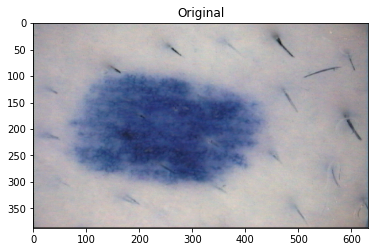

In [6]:
plt.imshow(img),plt.title('Original')

In [39]:
grayScale = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

(<matplotlib.image.AxesImage at 0x7f11a82dd940>, Text(0.5, 1.0, 'GrayScaled'))

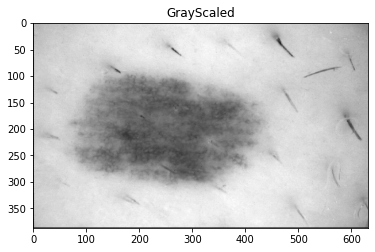

In [40]:

plt.imshow(grayScale, cmap='gray'),plt.title('GrayScaled')

In [41]:
kernel = cv2.getStructuringElement(1,(17,17))
opening = cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel)

(<matplotlib.image.AxesImage at 0x7f11a82c3070>, Text(0.5, 1.0, 'opening'))

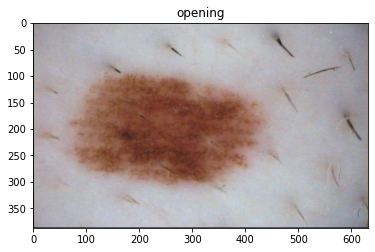

In [42]:
plt.imshow(img),plt.title('opening')

(<matplotlib.image.AxesImage at 0x7f11a81fa0a0>, Text(0.5, 1.0, 'blackhat'))

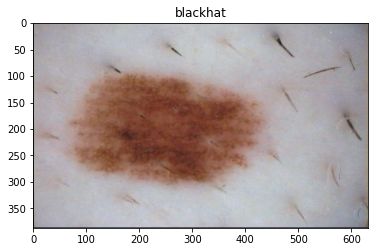

In [44]:
blackhat = cv2.morphologyEx(img, cv2.MORPH_BLACKHAT, kernel)
plt.imshow(img),plt.title('blackhat')

In [23]:
_,threshold = cv2.threshold(blackhat,10,255,cv2.THRESH_BINARY)

In [24]:
final_image = cv2.inpaint(img,threshold,1,cv2.INPAINT_TELEA)

error: OpenCV(4.4.0) /private/var/folders/nz/vv4_9tw56nv9k3tkvyszvwg80000gn/T/pip-req-build-b4ibzwe2/opencv/modules/photo/src/inpaint.cpp:759: error: (-210:Unsupported format or combination of formats) The mask must be 8-bit 1-channel image in function 'icvInpaint'


In [45]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

def hair_remove(image):
    
    # convert image to grayScale
    grayScale = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    plt.imshow(image),plt.title('grey-scaled')

    # kernel for morphologyEx
    kernel = cv2.getStructuringElement(1,(17,17))
    
    # apply MORPH_BLACKHAT to grayScale image
    blackhat = cv2.morphologyEx(grayScale, cv2.MORPH_BLACKHAT, kernel)
    plt.imshow(image),plt.title('blackhat')
    # apply thresholding to blackhat
    _,threshold = cv2.threshold(blackhat,10,255,cv2.THRESH_BINARY)
    
    # inpaint with original image and threshold image
    final_image = cv2.inpaint(image,threshold,1,cv2.INPAINT_TELEA)
    plt.imshow(final_image),plt.title('with treshold')
    final_image = cv2.medianBlur(final_image,5)
    plt.imshow(final_image),plt.title('after blur')
    return final_image

array([[[  0,   0,   0],
        [  0,   0,   0],
        [  0,   8,   0],
        ...,
        [114, 120, 120],
        [108, 120, 120],
        [108, 121, 120]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   8,   0],
        ...,
        [112, 120, 120],
        [108, 120, 120],
        [108, 121, 120]],

       [[  0,   0,   0],
        [  0,   8,   0],
        [  8,   8,   8],
        ...,
        [112, 120, 120],
        [108, 120, 120],
        [106, 120, 120]],

       ...,

       [[  0,   8,   8],
        [  8,   8,   8],
        [120, 120, 120],
        ...,
        [ 96, 104, 112],
        [ 88,  98, 112],
        [ 80,  96, 112]],

       [[  0,   0,   0],
        [  0,   0,   8],
        [  0,   8,   8],
        ...,
        [ 96, 104, 112],
        [ 83,  98, 112],
        [ 83,  96, 112]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [ 98, 104, 112],
        [ 83,  98, 112],
        [ 83,  98, 112]]

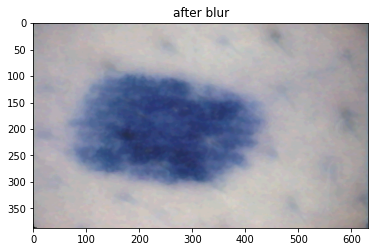

In [46]:
img = cv2.imread('./temp/skin cancer/SET_D/D423.BMP')
hair_remove(img)

(<matplotlib.image.AxesImage at 0x7f11a8137940>, Text(0.5, 1.0, 'Original'))

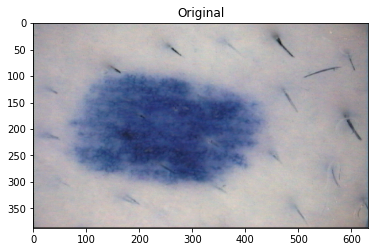

In [47]:
plt.imshow(img),plt.title('Original')

array([[[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [104, 106, 128],
        [ 96, 106, 128],
        [ 96, 106, 128]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [104, 111, 124],
        [ 96, 106, 124],
        [ 96, 106, 128]],

       [[  0,   0,   0],
        [  0,   8,   0],
        [  0,   8,   8],
        ...,
        [104, 112, 124],
        [ 96, 106, 128],
        [ 96, 106, 128]],

       ...,

       [[  0,   8,   8],
        [  0,   8,   8],
        [120, 120, 120],
        ...,
        [104, 112, 120],
        [ 98, 104, 120],
        [ 96, 104, 120]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   8,   8],
        ...,
        [104, 112, 114],
        [ 98, 111, 114],
        [ 96, 104, 116]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [104, 112, 114],
        [ 98, 111, 114],
        [ 96, 104, 114]]

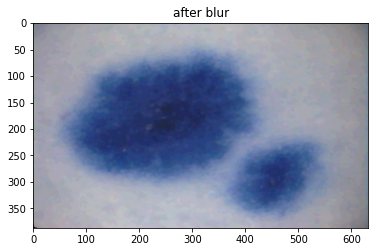

In [48]:
img2 = cv2.imread('./temp/skin cancer/SET_D/D389.BMP')
hair_remove(img2)

(<matplotlib.image.AxesImage at 0x7f11a8053670>, Text(0.5, 1.0, 'Original'))

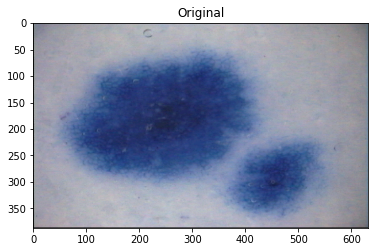

In [50]:
plt.imshow(img2),plt.title('Original')

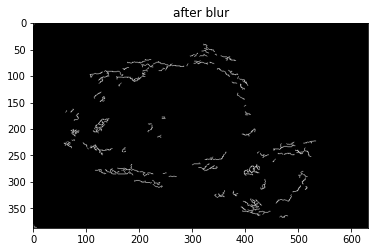

In [51]:
edges = cv2.Canny(hair_remove(img2),10,90)
plt.imshow(edges,cmap = 'gray')

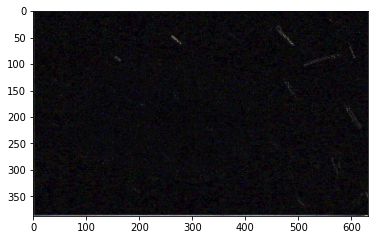

In [52]:
lap = cv2.Laplacian(img,cv2.CV_64F)
lap = np.uint8(np.absolute(lap))
plt.imshow(cv2.cvtColor(lap, cv2.COLOR_BGR2RGB))

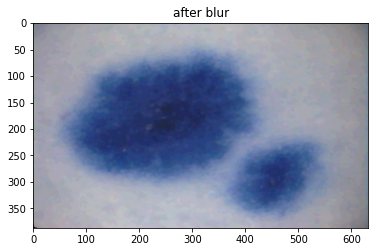

In [53]:

gray = cv2.cvtColor(hair_remove(img2), cv2.COLOR_BGR2GRAY)
gray = cv2.GaussianBlur(gray, (7, 7), 0)

edged = cv2.Canny(gray, 5, 10)
edged = cv2.dilate(edged, None, iterations=1)
edged = cv2.erode(edged, None, iterations = 1)

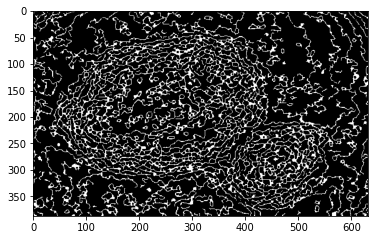

In [54]:
plt.imshow(cv2.cvtColor(edged, cv2.COLOR_BGR2RGB))

(<AxesSubplot:title={'center':'final'}>,
 Text(0.5, 1.0, 'final'))

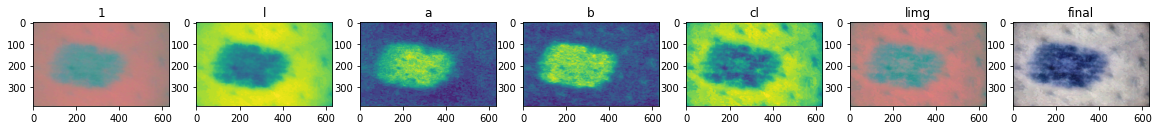

In [55]:

plt.figure(figsize=(20,2.5))

#-----Converting image to LAB Color model----------------------------------- 
lab= cv2.cvtColor(hair_remove(img), cv2.COLOR_BGR2LAB)

plt.subplot(1, 7, 1),plt.imshow(lab),plt.title('1')
#-----Splitting the LAB image to different channels-------------------------
l, a, b = cv2.split(lab)

plt.subplot(1, 7, 2),plt.imshow(l),plt.title('l')
plt.subplot(1, 7, 3),plt.imshow(a),plt.title('a')
plt.subplot(1, 7, 4),plt.imshow(b),plt.title('b')

#-----Applying CLAHE to L-channel-------------------------------------------
clahe = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(8,8))
cl = clahe.apply(l)
plt.subplot(1, 7, 5),plt.imshow(cl),plt.title('cl')

#-----Merge the CLAHE enhanced L-channel with the a and b channel-----------
limg = cv2.merge((cl,a,b))
plt.subplot(1, 7, 6),plt.imshow(limg),plt.title('limg')

#-----Converting image from LAB Color model to RGB model--------------------
final = cv2.cvtColor(limg, cv2.COLOR_LAB2BGR)
plt.subplot(1, 7, 7),plt.imshow(final),plt.title('final')

#_____END_____#

347.0

441.6729559300637

1.2728327260232384

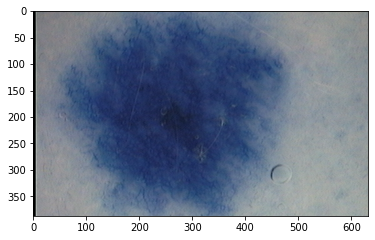

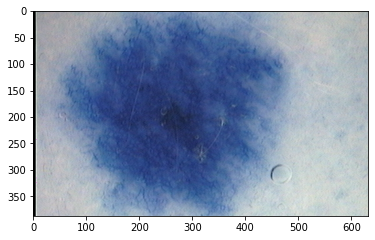

In [121]:
img3 = cv2.imread('./temp/skin cancer/SET_D/D54.BMP')
img4 = cv2.imread('./temp/skin cancer/SET_D/D110.BMP')


img = img4
img_float = img / 1.
l2 = np.sum(img_float**2,axis=-1)**0.5
max_l2 = l2.max()
display(max_l2)
theoretical_max_l2 = (3 * 255**2)**0.5
display(theoretical_max_l2)
scaling_factor = theoretical_max_l2 / max_l2
display(scaling_factor)
img_scaled = (img * scaling_factor)
img_scaled = img_scaled.astype(np.uint8)

plt.imshow(img)
plt.show()
plt.imshow(img_scaled)
plt.show()


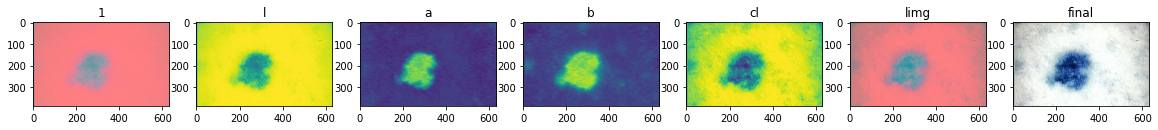

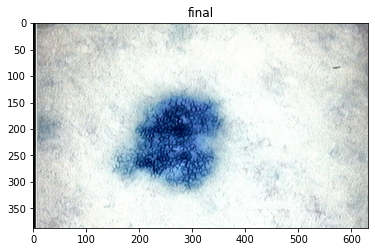

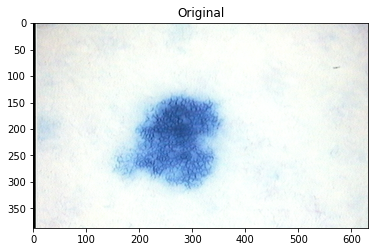

In [76]:


plt.figure(figsize=(20,2.5))

#-----Converting image to LAB Color model----------------------------------- 
lab= cv2.cvtColor(img3, cv2.COLOR_BGR2LAB)

plt.subplot(1, 7, 1),plt.imshow(lab),plt.title('1')
#-----Splitting the LAB image to different channels-------------------------
l, a, b = cv2.split(lab)

plt.subplot(1, 7, 2),plt.imshow(l),plt.title('l')
plt.subplot(1, 7, 3),plt.imshow(a),plt.title('a')
plt.subplot(1, 7, 4),plt.imshow(b),plt.title('b')

#-----Applying CLAHE to L-channel-------------------------------------------
clahe = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(8,8))
cl = clahe.apply(l)
plt.subplot(1, 7, 5),plt.imshow(cl),plt.title('cl')

#-----Merge the CLAHE enhanced L-channel with the a and b channel-----------
limg = cv2.merge((cl,a,b))
plt.subplot(1, 7, 6),plt.imshow(limg),plt.title('limg')

#-----Converting image from LAB Color model to RGB model--------------------
final = cv2.cvtColor(limg, cv2.COLOR_LAB2BGR)
plt.subplot(1, 7, 7),plt.imshow(final),plt.title('final')

#_____END_____#
plt.show()
plt.imshow(final),plt.title('final')
plt.show()
plt.imshow(img3),plt.title('Original')
plt.show()

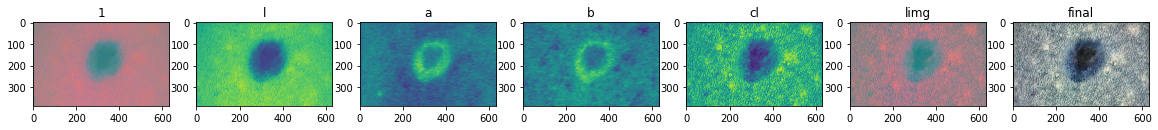

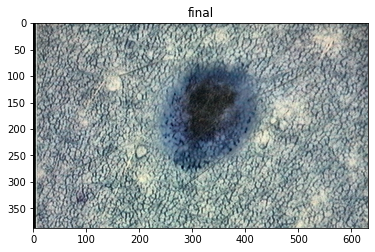

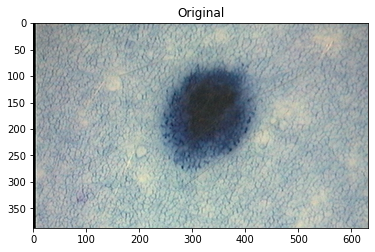

In [77]:

plt.figure(figsize=(20,2.5))

#-----Converting image to LAB Color model----------------------------------- 
lab= cv2.cvtColor(img4, cv2.COLOR_BGR2LAB)

plt.subplot(1, 7, 1),plt.imshow(lab),plt.title('1')
#-----Splitting the LAB image to different channels-------------------------
l, a, b = cv2.split(lab)

plt.subplot(1, 7, 2),plt.imshow(l),plt.title('l')
plt.subplot(1, 7, 3),plt.imshow(a),plt.title('a')
plt.subplot(1, 7, 4),plt.imshow(b),plt.title('b')

#-----Applying CLAHE to L-channel-------------------------------------------
clahe = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(8,8))
cl = clahe.apply(l)
plt.subplot(1, 7, 5),plt.imshow(cl),plt.title('cl')

#-----Merge the CLAHE enhanced L-channel with the a and b channel-----------
limg = cv2.merge((cl,a,b))
plt.subplot(1, 7, 6),plt.imshow(limg),plt.title('limg')

#-----Converting image from LAB Color model to RGB model--------------------
final = cv2.cvtColor(limg, cv2.COLOR_LAB2BGR)
plt.subplot(1, 7, 7),plt.imshow(final),plt.title('final')

#_____END_____#
plt.show()
plt.imshow(final),plt.title('final')
plt.show()
plt.imshow(img4),plt.title('Original')
plt.show()

TypeError: Image data of dtype object cannot be converted to float

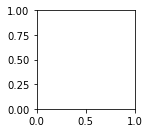

In [43]:
fgbg = cv2.createBackgroundSubtractorMOG2()
fgbg1 = cv2.createBackgroundSubtractorMOG2();    
fgbg2 = cv2.createBackgroundSubtractorMOG2(); 
#fgbg3 = cv2.createBackgroundSubtractorGMG2();
fgmask1 = fgbg1.apply(final); 
plt.subplot(1, 3, 1),plt.imshow(fgbg1),plt.title('fgbg1')

fgmask2 = fgbg2.apply(img); 
plt.subplot(1, 3, 2),plt.imshow(fgbg2),plt.title('fgbg2')
#fgmask3 = fgbg3.apply(img); 
#plt.subplot(1, 3, 3),plt.imshow(fgbg3),plt.title('fgbg3')

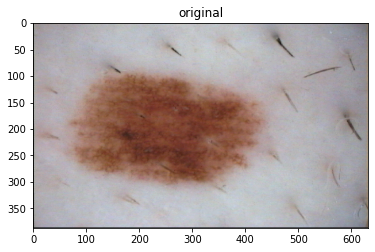

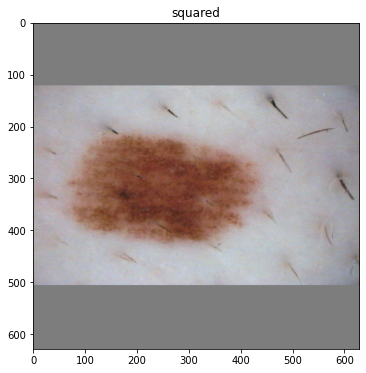

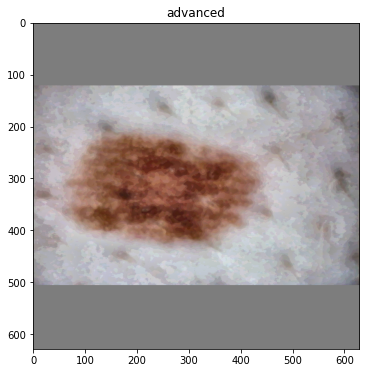

In [88]:
import cv2
from math import ceil
import matplotlib.pyplot as plt

img = cv2.imread('./temp/skin cancer/SET_D/D423.BMP')
test_image = cv2.imread('./temp/skin cancer/SET_D/D423.BMP')

def selma_secret_sauce(image, advanced = True, bigger_border = False, replicate_border = False, for_training = True, model_size = (256, 256)):
    
    def crop(image):
        '''this function cuts of the small black borders found on training images,
        so that expanding to squares with pixel replication works'''
        cut_left = 2
        cut_right = 2
        cut_top = 2
        cut_bottom = 2
        top_left = (cut_left, cut_top)
        bottom_right = (image.shape[1]-cut_right, image.shape[0]-cut_bottom)
        image = image[top_left[1]:(bottom_right[1] + 1), top_left[0]:(bottom_right[0] + 1)]
        return image
        
    
    def make_square(image, skip_cropping = False):
        '''make square with blurred border replication'''
        if skip_cropping == False:
            image = crop(image)
        if bigger_border == True:
            # enlarge border size to allow more room for augmentation rotation/shifting
            square_dimension = ceil((image.shape[1]**2 + image.shape[0]**2)**0.5*1.1)
        else:
            square_dimension = max(image.shape[1],image.shape[0])
        top_border = (square_dimension-image.shape[0])//2
        bottom_border = square_dimension-image.shape[0]-top_border
        left_border = (square_dimension-image.shape[1])//2
        right_border = square_dimension-image.shape[1]-left_border
        if replicate_border == True:
            square = cv2.copyMakeBorder(image,
                                        top_border,
                                        bottom_border,
                                        left_border,
                                        right_border,
                                        cv2.BORDER_REPLICATE)
            # blur the border (and the whole image)
            square = cv2.GaussianBlur(square,(19,19),cv2.BORDER_DEFAULT)
            # impose unblurred image on blurred square
            yoff = top_border
            xoff = left_border
            square[yoff:yoff+image.shape[0], xoff:xoff+image.shape[1]] = image
        else:
            # fill the border with grey instead
            square = cv2.copyMakeBorder(image,
                                        top_border,
                                        bottom_border,
                                        left_border,
                                        right_border,
                                        cv2.BORDER_CONSTANT,
                                        value = (125, 125, 125))
        
        return square
    
    # convert BMP to RGB format
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    # make square
    square = make_square(image)
    
    # don't continue processing when advanced is False, and resize to model dimension
    # when predicting
    if advanced == False:
        if for_training == False:
            square = cv2.resize(square, model_size, interpolation = cv2.INTER_AREA)
        return square
    
    # convert image to grayScale
    grayScale = cv2.cvtColor(crop(image), cv2.COLOR_RGB2GRAY)

    # kernel for morphologyEx
    kernel = cv2.getStructuringElement(1,(17,17))
    
    # apply MORPH_BLACKHAT to grayScale image
    blackhat = cv2.morphologyEx(grayScale, cv2.MORPH_BLACKHAT, kernel)
    # apply thresholding to blackhat
    _,threshold = cv2.threshold(blackhat,10,255,cv2.THRESH_BINARY)
    
    # inpaint with original image and threshold image
    hair_removal_image = cv2.inpaint(crop(image),threshold,1,cv2.INPAINT_TELEA)
    hair_removal_image = cv2.medianBlur(hair_removal_image,5)
    
    #-----Converting image to LAB Color model-----------------------------------
    lab = cv2.cvtColor(hair_removal_image, cv2.COLOR_RGB2LAB)
    
    #-----Splitting the LAB image to different channels-------------------------
    l, a, b = cv2.split(lab)
    
    #-----Applying CLAHE to L-channel-------------------------------------------
    clahe = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(8,8))
    cl = clahe.apply(l)
    
    #-----Merge the CLAHE enhanced L-channel with the a and b channel-----------
    limg = cv2.merge((cl,a,b))
    
    #-----Converting image from LAB Color model to RGB model--------------------
    final = cv2.cvtColor(limg, cv2.COLOR_LAB2RGB)
    
    # make square and resize in case of prediction
    final = make_square(final, skip_cropping = True)
    if for_training == False:
        final = cv2.resize(final, model_size, interpolation = cv2.INTER_AREA)
    return final

    #_____END_____#
    

plt.figure(figsize=(6, 6))
reference = cv2.cvtColor(test_image, cv2.COLOR_BGR2RGB)
plt.imshow(reference),plt.title('original')
plt.show()
plt.figure(figsize=(6, 6))
plt.imshow(selma_secret_sauce(test_image, advanced = False)),plt.title('squared')
plt.show()
plt.figure(figsize=(6, 6))
plt.imshow(selma_secret_sauce(test_image, advanced = True)),plt.title('advanced')
plt.show()
